# Abnormal Death In America
## by Mostafa Ahmed

## Investigation Overview

> The main goal of this analysis is to understand the diffrant intentions of abnoral death like Suicide, Homicied, and Accedents to help prevent such these circumstances.

## Dataset Overview

> This data contains 100798 entry which is collected through 3 years of 2012,2013, and 2014, and have differant information about the each event like:\
**police intervention, gender, race, place, intention, education, date.**

## Dataset Overview
> *plase be aware when we investigate race differances that this data is only represents America, so maybe results vary if we investigated the data of Africa or other region* \
*Also be aware that the white race represents 61% , Black or African American:13.4% , Hispanic and Latino (of any race): 18.3%, so that will effect the numbers* \
**Source**: https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States

In [1]:
# import all packages and set plots to be embedded inline
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
from matplotlib import cm

%matplotlib inline

sb.set(rc={'figure.figsize':(10,5)})

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("death_data_cleaned.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Intentions:

> this plot shows the most common intentions and causes of death in our dataset, \
Although we think that suicide is not common, \
but it appears that it's the highest intetion that lead to death.

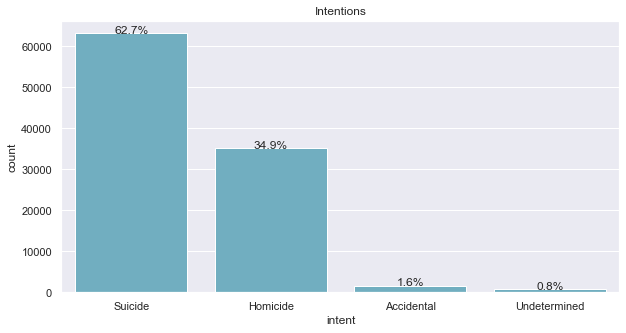

In [3]:
#set the base color
color = sb.color_palette()[9]

# plotting
plt.figure(figsize=(10,5))
sb.countplot(data = df,x = df["intent"], order = df.intent.value_counts().index, color=color);
for i in range(len(df.intent.value_counts())):
    ratio = df.intent.value_counts()[i] * 100 / df.intent.value_counts().sum()
    plt.text(y = df.intent.value_counts()[i], x = i, s ="{:0.1f}%".format(ratio), ha = 'center')
    
plt.title("Intentions");

## Places
> *this shows the places where abnormal death can happen,\
which can help us take a steps towards solving the problem*

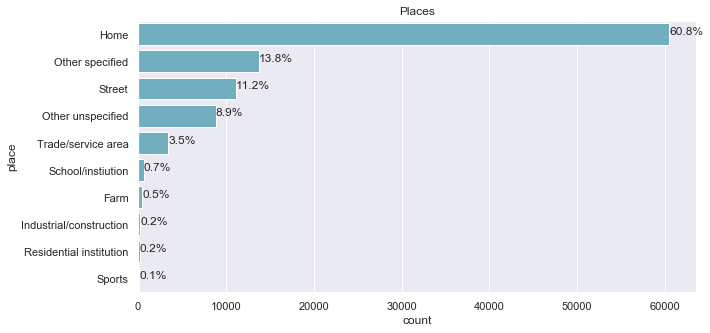

In [4]:
sb.countplot(data=df, y = "place", order = df.place.value_counts().index,color=color);

for i in range(len(df.place.value_counts())):
    pct_string = df.place.value_counts()[i] * 100 / df.place.value_counts().sum()
    plt.text(df.place.value_counts()[i],i,"{:0.1f}%".format(pct_string))
plt.title("Places");

## Men and Women Suicided

**i found these facts as i surfed the internet**\
*Women are even more likely than men to attempt suicide.\
In the US for example:,\
adult women in the US reported a suicide attempt 1.2 times as often as men.\
But male suicide methods are often more violent,\
making them more likely to be completed before anyone can intervent.*\
**Source:** https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women

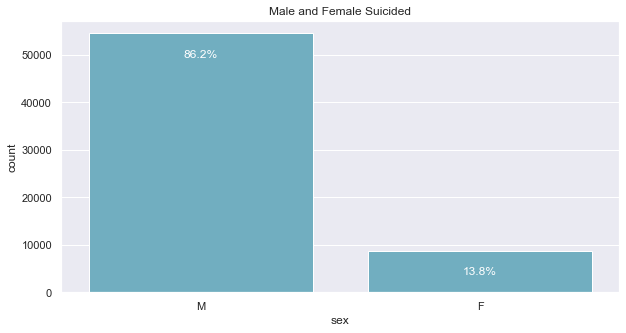

In [5]:
# Ratios
suicide_int = df.query("intent == 'Suicide'")

men_ration = suicide_int.sex.value_counts()[0] * 100 /\
                suicide_int.sex.value_counts().sum() 
women_ration = suicide_int.sex.value_counts()[1] * 100 /\
                suicide_int.sex.value_counts().sum() 

#plotting
plt.figure(figsize=(10,5))
sb.countplot(data = suicide_int,x = suicide_int.sex, order = suicide_int.sex.value_counts().index, color=color);

locs, labels = plt.xticks()
plt.text(locs[0], y = (suicide_int.sex.value_counts()[0] - 5000), s ="{:0.1f}%".format(men_ration), ha = 'center', color = 'w')
plt.text(locs[1], y = (suicide_int.sex.value_counts()[1] - 5000), s ="{:0.1f}%".format(women_ration), ha = 'center', color = 'w')
plt.title("Male and Female Suicided");

## Seasonality of over all death intentions
> *This Heat map allow us to see the seasonality of abnormal death,\
it's obvious that the concentration is at the spring and start of the summer,\
Also there is a weird observation that February has very low number of deaths,\
that needs further investgations with dataset that have more years*


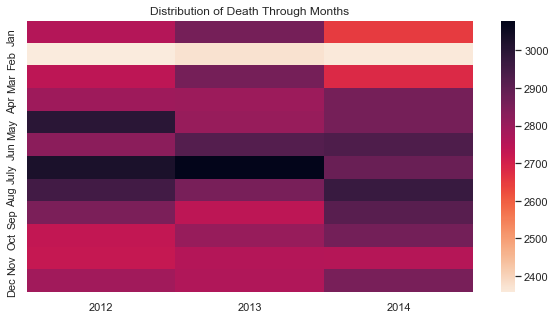

In [6]:
# set up the data
df_date_sep = df.date.apply(lambda x: x.split(" "))
month = df_date_sep.apply(lambda x: x[0])
year = df_date_sep.apply(lambda x: x[1])

ref = df.date.value_counts()
death_time = pd.DataFrame(columns = year.unique(),index = month.unique())

# fill pivot data frame with it's correspondent 
for year_piv in death_time.columns:
    for month_piv in death_time.index:
        for k_ref in ref.keys():
            month_ref = re.findall("[a-zA-Z]+",k_ref)
            year_ref = re.findall("[0-9]+",k_ref)
            if month_piv == str(month_ref[0]) and  year_piv == str(year_ref[0]):
                death_time.loc[month_piv, year_piv] = ref[k_ref]
                break
# plot   
plt.figure(figsize=(10,5))
death_time = death_time.astype(int)
sb.heatmap(data = death_time,cmap="rocket_r");
plt.title("Distribution of Death Through Months");

## Seasonality of Suicide
> *Because sucide have the highest portion of the data i decided to show it solo.*\
*Research on seasonal effects on suicide rates suggests that the prevalence of suicide is greatest during the late spring and early summer months, despite the common belief that suicide rates peak during the cold and dark months of the winter season.*\
**Source:** https://en.wikipedia.org/wiki/Seasonal_effects_on_suicide_rates#:~:text=3.4%20Psychology-,General%20effects,in%20the%20spring%20and%20summer.

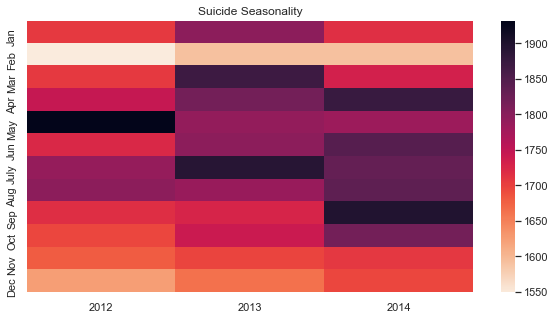

In [7]:
# set up the data
df_sucide = df.query("intent == 'Suicide'")
df_date_sep = df_sucide.date.apply(lambda x: x.split(" "))
month = df_date_sep.apply(lambda x: x[0])
year = df_date_sep.apply(lambda x: x[1])

ref = df_sucide.date.value_counts()
suicide_through_time = pd.DataFrame(columns = year.unique(),index = month.unique())

# fill pivot data frame with it's correspondent 
for year_piv in suicide_through_time.columns:
    for month_piv in suicide_through_time.index:
        for k_ref in ref.keys():
            month_ref = re.findall("[a-zA-Z]+",k_ref)
            year_ref = re.findall("[0-9]+",k_ref)
            if month_piv == str(month_ref[0]) and  year_piv == str(year_ref[0]):
                suicide_through_time.loc[month_piv, year_piv] = ref[k_ref]
                break
            
# plot
plt.figure(figsize=(10,5))
suicide_through_time = suicide_through_time.astype(int)
sb.heatmap(data = suicide_through_time,cmap="rocket_r");
plt.title("Suicide Seasonality");

## Intentions And Race
> *This plot shows which race is the highest at commetting specific intention, White race is the most suicide, and Black is the most Homicide.*

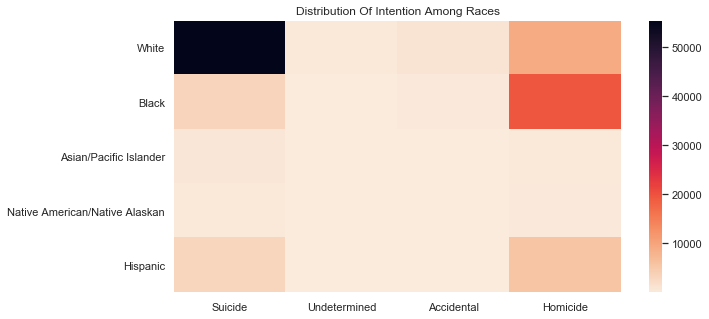

In [8]:
# data set-up
race_lst = df.race.unique()
intent_lst = df.intent.unique()[:-1]
container = dict()

for race in race_lst:
    for intent in intent_lst:
        total = df.query("race == '{}' and intent == '{}'".format(race,intent)).shape[0]
        #print(race,intent)
        container[race + " - " + intent] = total

index = set([re.findall("(.*)\ - ", i)[0] for i in container.keys()])

race_intent = pd.DataFrame(index=index,columns=intent_lst)

for k,v in container.items():
    indx_ref = re.findall("(.*)\ - ", k)[0]
    col_ref = re.findall("\ - (.*)", k)[0]
    for indx_df in race_intent.index:
        for col_df in race_intent.columns:
            if indx_ref == indx_df and col_df == col_ref:
                race_intent.loc[indx_df,col_df] = v
                break
# plotting
plt.figure(figsize=(10,5))
race_intent = race_intent.astype(int)
sb.heatmap(data=race_intent,cmap="rocket_r")
plt.title("Distribution Of Intention Among Races");

plt.savefig('dist_int_race_heatmap.png')

## Most race have been shooted by police
> *Yes White race is most shot by police but that not due to racist it's more likely because white race has the highest percentage by 61%, so that needs further investgation so we don't fall into simpson's paradox*\
**Source:**https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#:~:text=The%20White%2C%20non%2DHispanic%20or,and%20Latinos)%20being%2077%25.

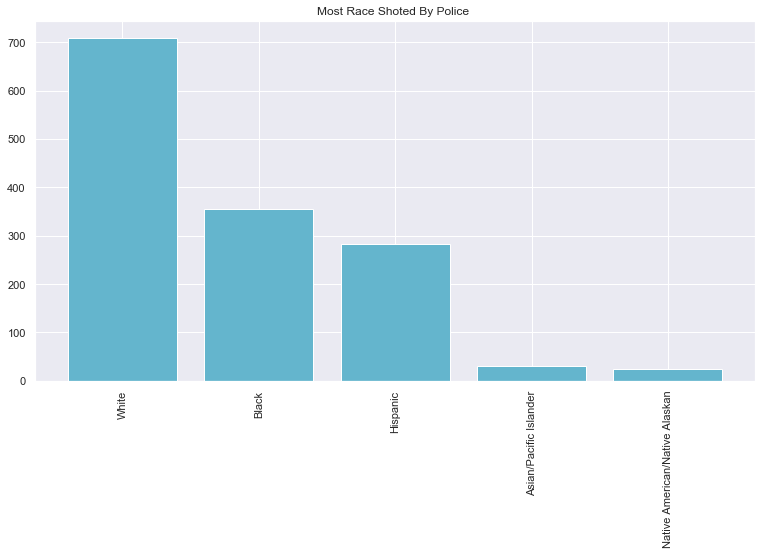

In [9]:
# set data
container = dict()
order=["White","Black",\
        "Hispanic","Asian/Pacific Islander","Native American/Native Alaskan"]

for elm in order:
    container[elm] = df.query("race == '{}'and police == True".format(elm)).shape[0]
    
# plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
race = [i for i in container.keys()]
police = [i for i in container.values()]
ax.bar(race,police,color=color)
plt.xticks(rotation='vertical')
plt.title("Most Race Shoted By Police ");

## Age and differant intentions
> *All categories have bimodal distributions except homicide most of it happens among young people*

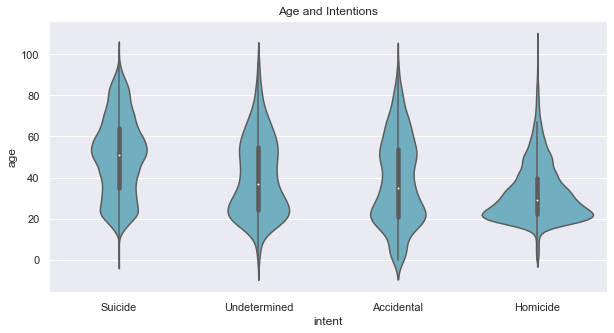

In [10]:
sb.violinplot(data=df,x="intent",y="age",color=color).set_title('Age and Intentions');
plt.savefig('age_int_violin.png')

## Distribution of Age Among Each Race
> This plot shows the distrution of age among each race, in thhe most common intentions in our dataset.\
*In both Homicide and suicide, white race density is arround 55, while other races density is arround 20 then it takes falling*

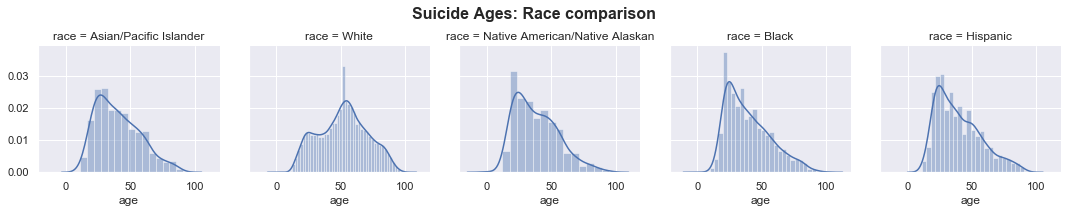

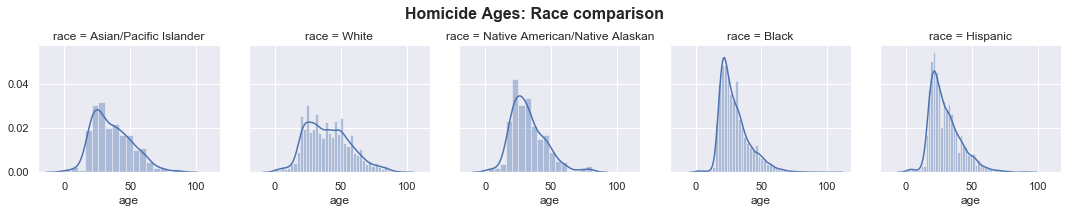

In [11]:
# get the same order for both grids for better comparison:
order = df.race.unique()

df_sub = df.copy()

df_sub['race'] = df['race'].astype('category')
df_sub.race.cat.set_categories(order, inplace=True)

suicide = df_sub.query("intent == 'Suicide'")
homicide = df_sub.query("intent == 'Homicide'")

# plotting
a = sb.FacetGrid(data=suicide,col="race")
a.map(sb.distplot, "age")
a.fig.suptitle('Suicide Ages: Race comparison', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.8)


b = sb.FacetGrid(data=homicide,col="race")
b.map(sb.distplot, "age")
b.fig.suptitle('Homicide Ages: Race comparison', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.8)

# Thank You

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [12]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 612168 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\MO\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\MO\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\MO\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\MO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\MO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\MO\a